## Creación de modelos para el analísis de imagenes de 5 tipos de insectos para su clasificación

**Importación de librerias**

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from keras.layers import *
from keras.models import *
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


**Lectura y preprocesamiento del conjunto de imagenes**

In [2]:
data_dir = '../Insects'


In [3]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.15,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                                ).flow_from_directory(directory=data_dir,
                                                      target_size=(300, 300),
                                                      subset='training',
                                                      ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.15,
                                ).flow_from_directory(directory=data_dir,
                                                      target_size=(300, 300),
                                                      subset='validation',
                                                      ),
}


Found 3784 images belonging to 5 classes.
Found 665 images belonging to 5 classes.


**Creación de los modelos**

In [108]:
# Modelo 1
"""model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
        input_shape=(300, 300, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 Output Neurons for 5 Classes



model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])"""


# Modelo 2 Añadiendo mas capas al modelo
"""model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(300, 300, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 Output Neurons for 5 Classes


model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])"""


# Modelo 3 Transfer learning de VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(300, 300, 3))

conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 Output Neurons for 5 Classes


model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
                  


In [109]:
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 conv2d_103 (Conv2D)         (None, 9, 9, 32)          147488    
                                                                 
 global_average_pooling2d_10  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_107 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dropout_23 (Dropout)        (None, 32)              

In [110]:
batch_size = 32
epochs = 10

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]


Para la optimización del tiempo del modelo, se encuentra el número de pasos optimo para cada epoca y su validación (Número de registros entre tamaño de batch)

In [111]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("Steps por ecpoca :", steps_per_epoch)
print("Steps de validación :", validation_steps)


steps_per_epoch : 118
validation_steps : 20


**Entrenamiento del modelo**

In [113]:

import tensorflow as tf

checkpoint_path = "model3.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_best_only=True, restore_best_weights=True)

with tf.device('GPU:0'):
    hist = model.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                     validation_data=valid_generator, validation_steps=validation_steps,
                     callbacks=[checkpoint])
model.load_weights(checkpoint_path)


Epoch 1/10
118/118 [==============================] - 1599s 14s/step - loss: 1.2431 - accuracy: 0.5272 - val_loss: 1.1764 - val_accuracy: 0.6094
Epoch 2/10
118/118 [==============================] - 1431s 12s/step - loss: 0.9130 - accuracy: 0.6599 - val_loss: 0.9307 - val_accuracy: 0.6891
Epoch 3/10
118/118 [==============================] - 1525s 13s/step - loss: 0.8427 - accuracy: 0.6938 - val_loss: 0.7538 - val_accuracy: 0.7063
Epoch 4/10
118/118 [==============================] - 1480s 13s/step - loss: 0.7979 - accuracy: 0.7138 - val_loss: 0.7557 - val_accuracy: 0.7094
Epoch 5/10
118/118 [==============================] - 1488s 13s/step - loss: 0.7790 - accuracy: 0.7127 - val_loss: 0.6532 - val_accuracy: 0.7734
Epoch 6/10
118/118 [==============================] - 1417s 12s/step - loss: 0.7001 - accuracy: 0.7471 - val_loss: 0.5839 - val_accuracy: 0.7906
Epoch 7/10
118/118 [==============================] - 1395s 12s/step - loss: 0.6496 - accuracy: 0.7684 - val_loss: 0.6452 - val_ac

Análisisi del modelo

Text(0.5, 1.0, 'Loss & Accuracy over time')

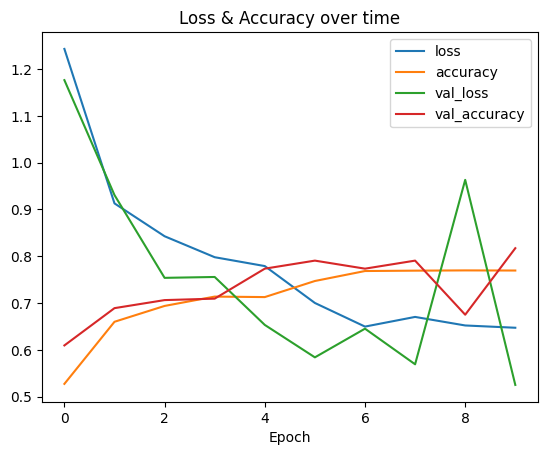

In [114]:
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(xlabel="Epoch")
plt.title("Loss & Accuracy over time")


In [115]:
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)


21/21 [==============================] - 248s 12s/step - loss: 0.5334 - accuracy: 0.8120
test accuracy :  0.8120300769805908


**Prueba del modelo con imagenes externas**

In [4]:
def predict(img_rel_path, model):

    loaded_model = keras.models.load_model(model)

    img = image.load_img(img_rel_path, target_size=(300, 300))

    img = image.img_to_array(img, dtype=np.uint8)

    img = np.array(img)/255.0

    p = loaded_model.predict(img[np.newaxis, ...])

    labels = {0: 'Mariposa', 1: 'Libelula',
              2: 'Chapulin', 3: 'Mariquita', 4: 'Mosquito'}

    predicted_class = labels[np.argmax(p[0], axis=-1)]

    classes = []
    prob = []

    for i, j in enumerate(p[0], 0):
        classes.append(labels[i])
        prob.append(round(j*100, 2))
        print(labels[i], prob[i])

    plt.title("Es un/a " + predicted_class)
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    def plot_bar_x():
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Insectos', fontsize=8)
        plt.ylabel('Probabilidad', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Gráfico de probabilidades')
        plt.show()
    plot_bar_x()


1/1 [==============================] - 1s 792ms/step
Mariposa 7.58
Libelula 1.81
Chapulin 3.13
Mariquita 1.31
Mosquito 86.16


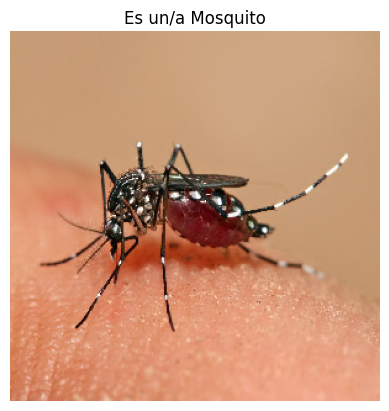

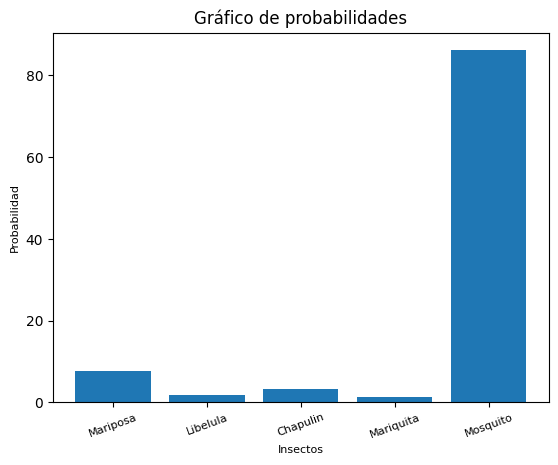

In [8]:
img_insect = "../ImagenesPrueba/mosquito.jpg"
n_model = "../Modelos/model3.h5"

predict(img_insect, n_model)
